In [1]:
# 1 Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.
# 2 What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?
# 3 ow, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
# 4 What is the correlation between the overall score variable and the 1st principal component?
# 5 If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
useducation.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [5]:
# fill in null values
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
              'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G','AVG_MATH_4_SCORE',]
states = useducation['STATE'].unique()
for state in states:
    useducation.loc[useducation['STATE']== state,column_list] = useducation.loc[useducation['STATE']==state,column_list].interpolate(method='linear',limit_direction='forward')

useducation.dropna(inplace=True)

In [6]:
# Question 1
useducation.isnull().sum()*100/useducation.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [7]:
useducation['overall_score'] = (useducation['GRADES_4_G'] * ((useducation['AVG_MATH_4_SCORE']+useducation['AVG_READING_4_SCORE'])* 0.5)
                               + useducation['GRADES_8_G'] * ((useducation['AVG_MATH_8_SCORE']+useducation['AVG_READING_8_SCORE'])* 0.5))/(useducation['GRADES_4_G'] + useducation['GRADES_8_G'])
print(useducation['overall_score'])
print(len(useducation))

209     235.106342
211     238.321404
212     240.773675
213     234.719834
214     247.750273
215     250.735755
217     214.015451
218     235.094096
220     233.380993
224     253.292493
226     235.566500
227     233.293925
228     249.048856
229     239.768842
230     244.523120
235     251.780473
240     238.196210
242     243.670629
251     240.094503
252     244.699649
255     243.779570
256     246.177765
258     250.543086
372     251.042285
416     235.863027
418     239.899103
419     239.528677
420     235.179063
422     252.492779
424     210.794614
           ...    
1462    255.438803
1463    253.984249
1464    251.798676
1465    242.666326
1466    250.682887
1467    253.368293
1468    262.452134
1469    252.923462
1470    257.810298
1471    247.304408
1472    249.505607
1473    252.993607
1474    255.993860
1475    247.378895
1476    257.309000
1477    261.773192
1478    245.074322
1479    248.580997
1480    252.680110
1481    253.242575
1482    255.054666
1483    249.

In [8]:
# question 2 What are the correlations between this newly created score variable and the expenditure types? Which 1 of
#   the expenditure types is more correlated than the others?

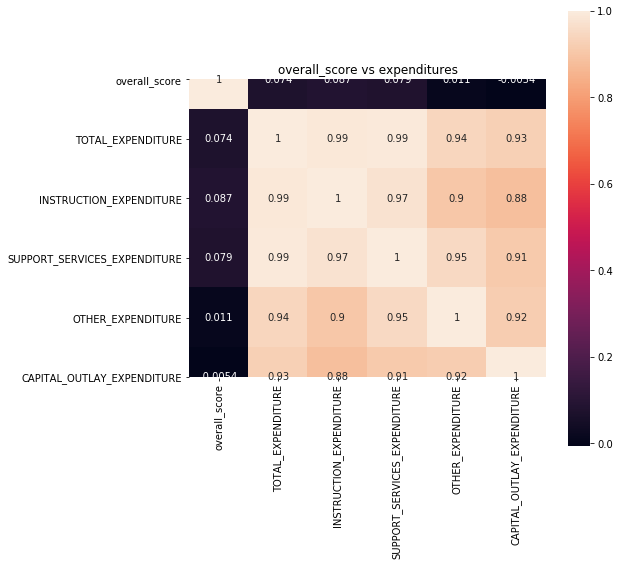

In [9]:
education2=useducation[['overall_score','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]
type(education2)

plt.figure(figsize=(8,8))
corr_expenditure=education2.corr()
sns.heatmap(corr_expenditure,square=True, annot=True)
plt.title('overall_score vs expenditures')
plt.show()
# shown in heatmap, the most related expenditure is instruction expenditure

In [10]:
# Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [11]:
#expenditure=useducation[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]
expenditure=useducation[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]


In [12]:
#standardize data
#expenditure['TOTAL_EXPENDITURETOTAL'] = (expenditure['TOTAL_EXPENDITURE'] - expenditure['TOTAL_EXPENDITURE'].mean()) / expenditure['TOTAL_EXPENDITURE'].std()
expenditure['INSTRUCTION_EXPENDITURE'] = (expenditure['INSTRUCTION_EXPENDITURE'] - expenditure['INSTRUCTION_EXPENDITURE'].mean()) / expenditure['INSTRUCTION_EXPENDITURE'].std()
expenditure['SUPPORT_SERVICES_EXPENDITURE'] = (expenditure['SUPPORT_SERVICES_EXPENDITURE'] - expenditure['SUPPORT_SERVICES_EXPENDITURE'].mean()) / expenditure['SUPPORT_SERVICES_EXPENDITURE'].std()
expenditure['OTHER_EXPENDITURE'] = (expenditure['OTHER_EXPENDITURE'] - expenditure['OTHER_EXPENDITURE'].mean()) / expenditure['OTHER_EXPENDITURE'].std()
expenditure['CAPITAL_OUTLAY_EXPENDITURE'] = (expenditure['CAPITAL_OUTLAY_EXPENDITURE'] - expenditure['CAPITAL_OUTLAY_EXPENDITURE'].mean()) / expenditure['CAPITAL_OUTLAY_EXPENDITURE'].std()

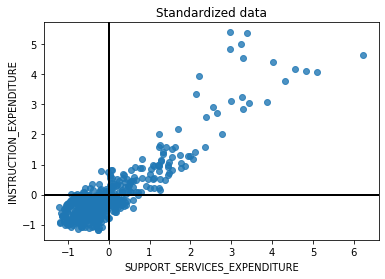

In [13]:
#plt standardized data
t = sns.regplot(
    expenditure['SUPPORT_SERVICES_EXPENDITURE'],
    expenditure['INSTRUCTION_EXPENDITURE'],
    expenditure,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()



In [14]:
type(expenditure)

pandas.core.frame.DataFrame

In [15]:
# covariance

expenditure = expenditure.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(expenditure)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00215054 0.97649399 0.90411344 0.88670093]
 [0.97649399 1.00215054 0.95433021 0.91320483]
 [0.90411344 0.95433021 1.00215054 0.92016275]
 [0.88670093 0.91320483 0.92016275 1.00215054]]


In [16]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print('\n')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

# why there are 6 eigenvector values???

Eigenvector 1: 
[-0.49872077 -0.508884   -0.50012988 -0.49212272]
Eigenvalue 1: 3.7801819695172636


Eigenvector 2: 
[-0.51731724  0.79350501 -0.31927696  0.02819378]
Eigenvalue 2: 0.013995308419871472


Eigenvector 3: 
[-0.5998946  -0.31891698  0.24059869  0.69320322]
Eigenvalue 3: 0.1340448210299463


Eigenvector 4: 
[ 0.35183367 -0.09838106 -0.76814361  0.52582282]
Eigenvalue 4: 0.08038005157055599


The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.9430175  0.00349132 0.03343929 0.02005189]


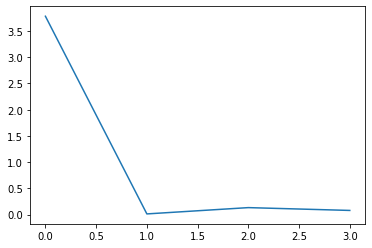

[3.78018197 0.01399531 0.13404482 0.08038005]


In [17]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

[[-0.49872077 -0.51731724 -0.5998946   0.35183367]
 [-0.508884    0.79350501 -0.31891698 -0.09838106]
 [-0.50012988 -0.31927696  0.24059869 -0.76814361]
 [-0.49212272  0.02819378  0.69320322  0.52582282]]
The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9430175  0.03343929]


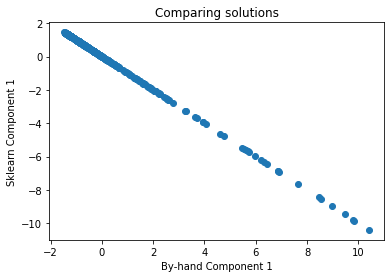

In [18]:
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]
print(eig_vec_cov)

# Transform X into Y.
Y = P.T.dot(Xt)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

# 94.30% of variance explained by PCA1

In [19]:
# Q4 What is the correlation between the overall score variable and the 1st principal component?

In [20]:
#print(eig_val_cov)
#print('  ')
#print(sklearn_pca)
#print('  ')
#print(Y_sklearn)
component1 = sklearn_pca.fit_transform(X)
print(component1)
education2['pca1']=component1[:,0]

[[-9.39455219e-01  6.92502159e-02]
 [-8.02866574e-01  2.93784221e-01]
 [-1.21966295e+00  3.64923297e-02]
 [ 3.64608838e+00  3.90795137e-02]
 [-9.58451297e-01  1.17225931e-01]
 [-1.03226508e+00 -1.53588467e-01]
 [-1.46151466e+00  1.73209604e-02]
 [ 9.40986044e-01  5.21891659e-01]
 [-1.34597616e+00  6.68028090e-02]
 [-1.13274946e+00 -1.34090882e-03]
 [-9.49805161e-01  7.52969447e-02]
 [-9.45229034e-01  1.35929104e-02]
 [-1.37895528e+00 -1.44027178e-03]
 [-7.39460263e-01 -5.99283592e-02]
 [-7.13838317e-01 -2.02298641e-01]
 [-1.44190055e+00  1.66543234e-02]
 [-1.29993691e+00  7.34016328e-02]
 [-5.22001126e-01  9.07804210e-02]
 [-9.05785436e-01  6.46936336e-02]
 [ 1.89996144e+00  3.11774082e-01]
 [-5.15817356e-01  5.68163249e-02]
 [-5.56018209e-01  1.52418727e-01]
 [-6.88585838e-01 -2.89427148e-02]
 [-1.41138683e+00 -1.47494926e-02]
 [-6.63468798e-01  1.96464513e-01]
 [-7.03628485e-01  1.79246315e-01]
 [-1.18855930e+00 -2.17188731e-02]
 [ 5.53694527e+00  7.16688193e-01]
 [-8.54987524e-01 -1

In [21]:

education2[["overall_score", "pca1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,pca1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.044596,0.074155,0.087386,0.079002,0.010959,-0.005389
pca1,0.044596,1.000000,0.992054,0.968606,0.988345,0.971343,0.955792
TOTAL_EXPENDITURE,0.074155,0.992054,1.000000,0.990255,0.992988,0.943702,0.925784
INSTRUCTION_EXPENDITURE,0.087386,0.968606,0.990255,1.000000,0.974399,0.902173,0.884798
SUPPORT_SERVICES_EXPENDITURE,0.079002,0.988345,0.992988,0.974399,1.000000,0.952282,0.911245
OTHER_EXPENDITURE,0.010959,0.971343,0.943702,0.902173,0.952282,1.000000,0.918188
CAPITAL_OUTLAY_EXPENDITURE,-0.005389,0.955792,0.925784,0.884798,0.911245,0.918188,1.000000


In [22]:

plt.figure(figsize=(8,8))
sns.heatmap(corr_q4,square = True, annot = True)
plt.title('corr between overall score and component1')
plt.show()

NameError: name 'corr_q4' is not defined

<Figure size 576x576 with 0 Axes>

In [ ]:
len(useducation['overall_score'])

In [ ]:
#If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of 
# the expenditure variables? Why?

In the correlation matrix, it's clear to see, instruction_expenditure ha higher corr with overall_score, so should choose 
instruction_expenditure. And between variables in the dataframe education2, variables are highly correlated with each other,
which is not a good scanrio for PCA, may cause instable estimation of PCA calculation